### Peer-graded Assignment: Build a Regression Model in Keras

__Download and Clean Dataset__

In [1]:
import pandas as pd
import numpy  as np

In [2]:
concr_data = pd.read_csv('concrete_data.csv')

In [3]:
concr_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
concr_data.shape

(1030, 9)

In [5]:
concr_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [6]:
concr_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
target = "Strength"
X = concr_data.copy()
y = X.pop(target)

In [8]:
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [9]:
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [10]:
# what are the number of predictors
n_cols      = X.shape[1]
input_shape = (n_cols,)

__Part A: Build a baseline model__

___Part A.1: Split data into training and test___

In [11]:
# Import the train_test_split of scikit-learn
from sklearn.model_selection import train_test_split

___Part A.2: Train a regression model___

In [12]:
from tensorflow import keras as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

___Build a Neural Network___

In [13]:
# defining regression model
def regression_model(network_arch,
                     input_shape,
                     optimizer = "adam",
                     loss = "mean_squared_error",
                    ):
    """
    Function to build the regression model
    
    parameters:
    -----------
      - network_arch: dictionary with the following structure
          {"layer_1": {"u_units": n, "activation": activation},
           ...
           "layer_n": {"u_units"}
          }
      - input_shape: tuple with the shape of the input
      - optimizer:   string, name of the optimizer to use
      - loss:        string, name of the loss function to minimize
      
    returns:
    --------
      - A compiled model
    """
    
    # create model
    model = Sequential()
    
    nlayers     = len(network_arch)
    final_layer = "layer_" + str(nlayers)
    
    for k,layer in network_arch.items():
        n_units    = layer.get("n_units")
        activation = layer.get("activation")
        if k == "layer_1":
            model.add(Dense(n_units, activation=activation, input_shape=input_shape))
        elif k == final_layer:
            model.add(Dense(n_units))
        else:
            model.add(Dense(n_units, activation=activation))
    
    # compile model
    model.compile(optimizer=optimizer, loss=loss)
    return model

___Model architecture___

In [14]:
# modeling the architecture
model_architecture1 = {"layer_1": {"n_units": 10, "activation": "relu"},
                       "layer_2": {"n_units":  1},
                      }

print()
print("input_shape    = {}".format(input_shape))
print("network_config = {}".format(model_architecture1))
print()


input_shape    = (8,)
network_config = {'layer_1': {'n_units': 10, 'activation': 'relu'}, 'layer_2': {'n_units': 1}}



___Part A.3: Train and test a regression model several times___

In [15]:
# import the metric to evaluate the model performance
from sklearn.metrics import mean_squared_error

In [16]:
# Define a function for the loops 
def train_and_test_several_models(X,y,
                                  test_size,
                                  model_arch,
                                  input_shape,
                                  optimizer,
                                  loss,
                                  niterations,
                                  epochs,
                                  pred_norm = False,
                                  seed = 345,
                                  verbose = 2,
                                 ):
    """
    Function for training and testing several model on random train/test splits
    
    parameters:
    -----------
      - X,y:         the data. X are the predictors and y the target
      - seed:        int, with a seed to be used in the train/test splitting
      - test_size:   float (0,0.5). Size of the test-sample as a fraction of the whole data-set
      - model_arch:  dict. Architecture of the model (see regression_model above)
      - input_shape: 2-tuple with the input shape
      - optimizer:   string. optimizer name
      - loss:        string. loss function name
      - niterations: int. number of iterations to perform the train/test split, model training and testing
      - epoch:       int. number of epochs for model training
      - pred_norm:   bool. If True will apply normalization on the predictors
      - verbose:     int >= 0. level of verbosity.
      
    returns:
    --------
      - mse_results: np.array with the sqrt(mse) metric evaluated on the test-samples
    """
    
    # Array to store the results of the model evaluation on the test set
    metric_list = np.zeros(niterations)
    
    print()
    print("Launching {} iterations of".format(niterations))
    print(" - train/test split => test_size = {}".format(test_size))
    if pred_norm:
        print(" - Apply predictors normalization")
    else:
        print(" - No    predictors normalization")
    print(" - model architecture: {}".format(model_arch))
    print(" - model training:")
    print("   * epochs    = {}".format(epochs))
    print("   * optimizer = {}".format(optimizer))
    print("   * loss      = {}".format(loss))
    print()
    
    # Start the loop
    for i in range(niterations):
        # Apply the train test split
        myseed = seed + i*2 # seed used for the train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=myseed)

        # Start by building the model
        model = regression_model(network_arch = model_arch,
                                 input_shape  = input_shape,
                                 optimizer    = optimizer,
                                 loss         = loss)
        
        if pred_norm:
            # If requested apply predictors normalization
            # first calculate the mean and std on the train-sample
            X_train_mean = X_train.mean()
            X_train_std  = X_train.std()
            
            # then apply them on both, the train and test samples
            X_train = (X_train - X_train_mean)/X_train_std
            X_test  = (X_test  - X_train_mean)/X_train_std

        myverbose = 0
        if i == 0:
            myverbose = verbose
            print("Train/test splitting for iteration {}".format(i+1))
            print("  X_train.shape = {}".format(X_train.shape))
            print("  y_train.shape = {}".format(y_train.shape))
            print("  X_test.shape  = {}".format(X_test.shape))
            print("  y_test.shape  = {}".format(y_test.shape))
            print(X_train.head())
            print()
            print("Model summary for iteration {}".format(i+1))
            model.summary()
            print()
            print()

        # Model training
        model.fit(X_train, y_train, epochs=epochs, verbose=verbose)

        # model predictions on test sample
        y_pred = model.predict(X_test)

        # Model evaluation on test sample
        result = np.sqrt(mean_squared_error(y_test,y_pred))
        print("{}: sqrt(mse) = {}".format(i+1,result))
        metric_list[i] = result
    
    
    print()
    
    return metric_list

In [17]:
niterations = 50  # Number of iterations
test_size   = 0.3 # test sample size

In [18]:
# launch the loop
sq_mse_list_A = train_and_test_several_models(X = X,
                                              y = y,
                                              test_size   = test_size,
                                              model_arch  = model_architecture1,
                                              input_shape = input_shape,
                                              optimizer   = "adam",
                                              loss        = "mean_squared_error",
                                              niterations = niterations,
                                              epochs      = 50,
                                              seed        = 345,
                                              verbose     = 0,
                                              pred_norm   = False,
                                             )


Launching 50 iterations of
 - train/test split => test_size = 0.3
 - No    predictors normalization
 - model architecture: {'layer_1': {'n_units': 10, 'activation': 'relu'}, 'layer_2': {'n_units': 1}}
 - model training:
   * epochs    = 50
   * optimizer = adam
   * loss      = mean_squared_error

Train/test splitting for iteration 1
  X_train.shape = (721, 8)
  y_train.shape = (721,)
  X_test.shape  = (309, 8)
  y_test.shape  = (309,)
     Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
870   149.0               139.0    109.0  193.0               6.0   
875   155.0               183.0      0.0  193.0               9.0   
488   387.0                20.0     94.0  157.0              14.3   
10    198.6               132.4      0.0  192.0               0.0   
391   397.0                17.2    158.0  167.0              20.8   

     Coarse Aggregate  Fine Aggregate  Age  
870             892.0           780.0   28  
875            1047.0           697.0   28  
488      

C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101 (404.00 B)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 0 (0.00 B)



10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
1: sqrt(mse) = 14.162283248063877


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
2: sqrt(mse) = 58.47066843383435


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3: sqrt(mse) = 10.810352625255755


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4: sqrt(mse) = 11.408815064776926


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5: sqrt(mse) = 11.741219719063338


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
6: sqrt(mse) = 9.362702865802039


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7: sqrt(mse) = 21.660701112470854


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8: sqrt(mse) = 34.61465717615946


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
9: sqrt(mse) = 10.375133467236855


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10: sqrt(mse) = 18.033210590968036


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
11: sqrt(mse) = 11.889261475058479


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
12: sqrt(mse) = 13.049493831275893


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13: sqrt(mse) = 19.64356268686762


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
14: sqrt(mse) = 12.375357665650922


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
15: sqrt(mse) = 24.72609421024938


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
16: sqrt(mse) = 13.055825328479472


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
17: sqrt(mse) = 13.071219319774336


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
18: sqrt(mse) = 11.190354253811527


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
19: sqrt(mse) = 12.230437585862271


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
20: sqrt(mse) = 12.189869238977801


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
21: sqrt(mse) = 13.268378397191396


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
22: sqrt(mse) = 12.407710954846005


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
23: sqrt(mse) = 27.9251069759853


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
24: sqrt(mse) = 12.164467373965408


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
25: sqrt(mse) = 10.638118249881865


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
26: sqrt(mse) = 15.727893264233447


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
27: sqrt(mse) = 15.219068178144836


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
28: sqrt(mse) = 12.96706071745724


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
29: sqrt(mse) = 11.216053012725027


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
30: sqrt(mse) = 10.888390914257755


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
31: sqrt(mse) = 10.852528545201599


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
32: sqrt(mse) = 15.006813734141442


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
33: sqrt(mse) = 12.101362195413829


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
34: sqrt(mse) = 16.896247092882632


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
35: sqrt(mse) = 16.748173910137705


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
36: sqrt(mse) = 12.475351519302711


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
37: sqrt(mse) = 17.96593333388046


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
38: sqrt(mse) = 20.814242437527593


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
39: sqrt(mse) = 29.982065470826146


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
40: sqrt(mse) = 11.282367898369925


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
41: sqrt(mse) = 31.186337459984802


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
42: sqrt(mse) = 11.37948108489443


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
43: sqrt(mse) = 17.617588927637552


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
44: sqrt(mse) = 36.01267958530025


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
45: sqrt(mse) = 19.93144820650411


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
46: sqrt(mse) = 10.383963920285517


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
47: sqrt(mse) = 20.40122062106282


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
48: sqrt(mse) = 19.364461552643583


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
49: sqrt(mse) = 9.599225798307376


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
50: sqrt(mse) = 11.087760943098782



__Part A results__

In [19]:
# Calculation of the mean and the standard deviation of the metric on the 50 samplings
mean_sqmse_A = np.mean(sq_mse_list_A)
std_sqmse_A  = np.std(sq_mse_list_A)

# Generate a data frame to store the results of the differents parts of this project
df_results = pd.DataFrame.from_dict({"Part": ["A"],"mean_sq_mse": [mean_sqmse_A], "std_sq_mse": [std_sqmse_A]})
df_results

,Part,mean_sq_mse,std_sq_mse
0,A,16.751454,8.791785


In [20]:
# Define some of the common parameters for plotting
figsize = (10,8)
nbins   = 20

In [22]:
# Define a function for visualizing and comparing the results of the different parts for this project

import matplotlib.pyplot as plt
%matplotlib inline

def plot_results(result_list,
                 label_list,
                 var_name = "sq(mse)",
                 figsize = (15,10),
                 nbins = 10):
    """
    plotting function
    
    parameters:
    -----------
      - result_list: list of np.arrays with the metrics of the niterations
      - label_list:  list of labels
    """
    
    if len(result_list) != len(label_list):
        raise ValueError("lenghts of result_list and label_list has to be the same")
        
    if len(result_list) == 0:
        raise ValueError("lenght of result_list has to be > 0")
        
    color_list = ["b","r","m","y"]
    
    xmin = +1.0e+20
    xmax = -1.0e+20
    for arr in result_list:
        min_tmp = np.amin(arr)
        max_tmp = np.amax(arr)
        
        if xmin > min_tmp:
            xmin = min_tmp
        if xmax < max_tmp:
            xmax = max_tmp
    
    percent   = 0.01
    delta     = xmax - xmin
    xmin     -= percent*delta
    xmax     += percent*delta
        
    bins = np.linspace(xmin, xmax, nbins+1)
    
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
    
    porcent = 0.05
    ymax = -1.0e+20
    for i,arr in enumerate(result_list): 
        n,_,_ = ax.hist(x       = arr,
                        bins    = bins,
                        color   = color_list[i],
                        alpha   = 0.5,
                        density = False,
                        label   = label_list[i]
                       )
        
        if ymax < np.amax(n):
            ymax = np.amax(n)
        
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.legend()
    ax.set_xlim([bins[0],bins[-1]])
    ax.set_ylim([0,ymax*(1.0 + porcent)])
    ax.set_xlabel(var_name)
    ax.set_ylabel('Occurences')
    ax.set_title(var_name + ' distribution')

    fig.tight_layout()

    plt.show()
          

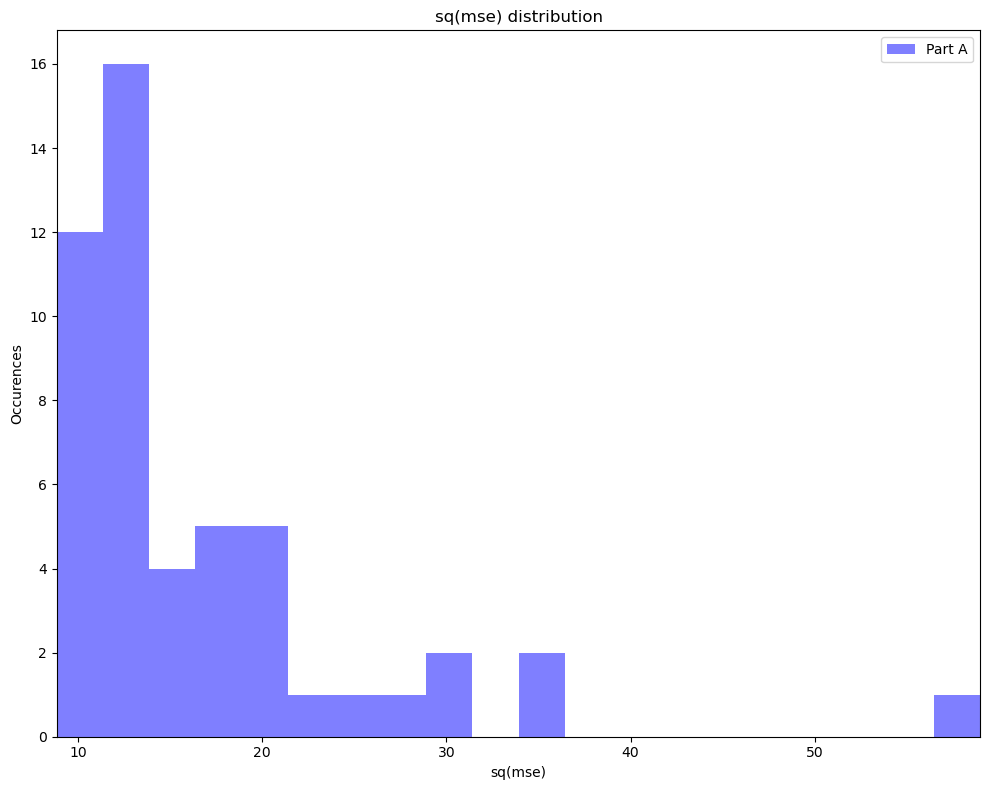

In [23]:
plot_results(result_list = [sq_mse_list_A],
             label_list  = ["Part A"],
             var_name = "sq(mse)",
             figsize = figsize,
             nbins = nbins)

__Part B: Normalize the data__

In [24]:
# Just launch the function above (train_and_test_several_models), but with pred_norm = True
sq_mse_list_B = train_and_test_several_models(X = X,
                                              y = y,
                                              test_size   = test_size,
                                              model_arch  = model_architecture1,
                                              input_shape = input_shape,
                                              optimizer   = "adam",
                                              loss        = "mean_squared_error",
                                              niterations = niterations,
                                              epochs      = 50,
                                              seed        = 3675,
                                              verbose     = 0,
                                              pred_norm   = True,
                                             )


Launching 50 iterations of
 - train/test split => test_size = 0.3
 - Apply predictors normalization
 - model architecture: {'layer_1': {'n_units': 10, 'activation': 'relu'}, 'layer_2': {'n_units': 1}}
 - model training:
   * epochs    = 50
   * optimizer = adam
   * loss      = mean_squared_error

Train/test splitting for iteration 1
  X_train.shape = (721, 8)
  y_train.shape = (721,)
  X_test.shape  = (309, 8)
  y_test.shape  = (309,)
       Cement  Blast Furnace Slag   Fly Ash     Water  Superplasticizer  \
723  0.260617           -0.863998 -0.825639  0.448707         -1.007613   
112  1.477748            1.174001 -0.825639  0.163870          0.870100   
278 -0.292281           -0.863998  1.058232  0.282552         -0.026465   
641 -0.305490           -0.863998 -0.825639 -0.026021         -1.007613   
270 -0.477209           -0.863998  1.110782 -0.405804          0.125781   

     Coarse Aggregate  Fine Aggregate       Age  
723          0.481434        0.718580 -0.271735  
112     

C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_100 (Dense)                    │ (None, 10)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_101 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101 (404.00 B)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 0 (0.00 B)



10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1: sqrt(mse) = 17.5647247175963


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2: sqrt(mse) = 20.102776049853638


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3: sqrt(mse) = 18.623240728073938


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4: sqrt(mse) = 18.178619586241872


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5: sqrt(mse) = 18.394287042758606


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
6: sqrt(mse) = 18.0931962365109


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7: sqrt(mse) = 20.33510792631122


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8: sqrt(mse) = 19.883347799069465


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
9: sqrt(mse) = 19.702815768535064


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10: sqrt(mse) = 20.47402395902272


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
11: sqrt(mse) = 21.001355583904523


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
12: sqrt(mse) = 19.05788217126181


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13: sqrt(mse) = 18.439921065315332


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
14: sqrt(mse) = 25.518785337664937


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
15: sqrt(mse) = 15.4128487469945


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
16: sqrt(mse) = 19.088943645439244


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
17: sqrt(mse) = 16.895436980415354


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
18: sqrt(mse) = 17.13306166688079


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
19: sqrt(mse) = 20.912633181126974


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
20: sqrt(mse) = 18.488619105741485


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
21: sqrt(mse) = 23.45434650167739


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
22: sqrt(mse) = 16.451875297890027


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
23: sqrt(mse) = 15.956495762710167


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
24: sqrt(mse) = 18.100573469548888


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
25: sqrt(mse) = 22.636630465095656


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
26: sqrt(mse) = 18.146661634429055


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
27: sqrt(mse) = 19.43585967404023


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
28: sqrt(mse) = 15.677261273426604


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
29: sqrt(mse) = 16.332884105216113


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
30: sqrt(mse) = 19.589857354219543


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
31: sqrt(mse) = 17.116122374832255


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
32: sqrt(mse) = 16.58399945935894


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
33: sqrt(mse) = 19.750971528461914


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
34: sqrt(mse) = 15.850261728865071


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
35: sqrt(mse) = 20.094709261953906


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
36: sqrt(mse) = 18.378444832932036


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
37: sqrt(mse) = 18.689992714401992


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
38: sqrt(mse) = 19.7558506784737


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
39: sqrt(mse) = 16.347691203208612


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
40: sqrt(mse) = 18.181232222235007


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
41: sqrt(mse) = 18.030803255645385


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
42: sqrt(mse) = 18.822396613226648


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
43: sqrt(mse) = 20.07220748726622


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
44: sqrt(mse) = 18.06061550180862


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
45: sqrt(mse) = 22.294343980713354


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
46: sqrt(mse) = 17.91112999222107


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
47: sqrt(mse) = 16.32909495405935


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
48: sqrt(mse) = 20.69992946522103


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
49: sqrt(mse) = 16.40239871298313


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
50: sqrt(mse) = 16.112880017162805



In [25]:
# Calculate the mean and the standard deviation of the metric on the 50 samplings
mean_sqmse_B = np.mean(sq_mse_list_B)
std_sqmse_B  = np.std(sq_mse_list_B)

df_results.loc[df_results.shape[0]] = ["B",mean_sqmse_B,std_sqmse_B]
df_results

,Part,mean_sq_mse,std_sq_mse
0,A,16.751454,8.791785
1,B,18.691383,2.079920


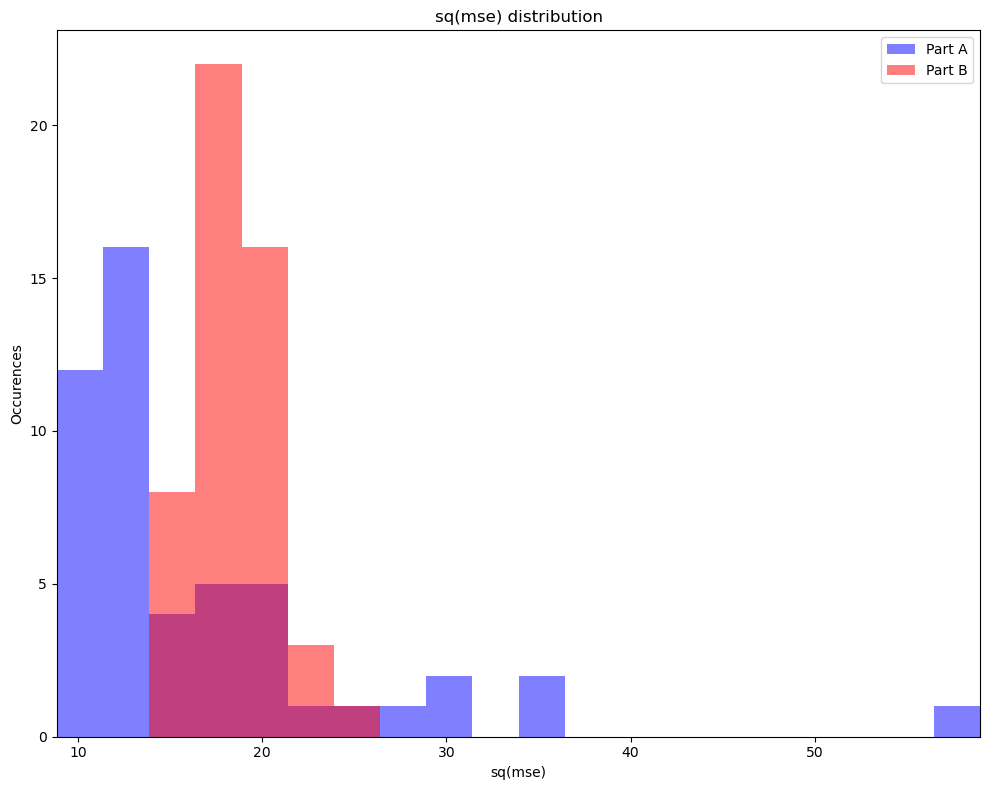

In [26]:
plot_results(result_list = [sq_mse_list_A,sq_mse_list_B],
             label_list  = ["Part A","Part B"],
             var_name = "sq(mse)",
             figsize = figsize,
             nbins = nbins)

__Compare the mean squared errors of B to A?__  
By rormalizing the predictors we are increasing the mean value of the mse we obtain, while significantly decreasing it standard deviation

__Part C: Increate the number of epochs__   
Repeat Part B but use 100 epochs this time for training.

How does the mean of the mean squared errors compare to that from Step B?

In [27]:
# launch the function above (train_and_test_several_models), but with pred_norm = True and epochs = 100
sq_mse_list_C = train_and_test_several_models(X = X,
                                              y = y,
                                              test_size   = test_size,
                                              model_arch  = model_architecture1,
                                              input_shape = input_shape,
                                              optimizer   = "adam",
                                              loss        = "mean_squared_error",
                                              niterations = niterations,
                                              epochs      = 100,
                                              seed        = 3675,
                                              verbose     = 0,
                                              pred_norm   = True,
                                             )


Launching 50 iterations of
 - train/test split => test_size = 0.3
 - Apply predictors normalization
 - model architecture: {'layer_1': {'n_units': 10, 'activation': 'relu'}, 'layer_2': {'n_units': 1}}
 - model training:
   * epochs    = 100
   * optimizer = adam
   * loss      = mean_squared_error

Train/test splitting for iteration 1
  X_train.shape = (721, 8)
  y_train.shape = (721,)
  X_test.shape  = (309, 8)
  y_test.shape  = (309,)
       Cement  Blast Furnace Slag   Fly Ash     Water  Superplasticizer  \
723  0.260617           -0.863998 -0.825639  0.448707         -1.007613   
112  1.477748            1.174001 -0.825639  0.163870          0.870100   
278 -0.292281           -0.863998  1.058232  0.282552         -0.026465   
641 -0.305490           -0.863998 -0.825639 -0.026021         -1.007613   
270 -0.477209           -0.863998  1.110782 -0.405804          0.125781   

     Coarse Aggregate  Fine Aggregate       Age  
723          0.481434        0.718580 -0.271735  
112    

C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_100"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_200 (Dense)                    │ (None, 10)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_201 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101 (404.00 B)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 0 (0.00 B)



10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
1: sqrt(mse) = 13.482403457070271


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2: sqrt(mse) = 12.995972371516736


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3: sqrt(mse) = 13.686247374661926


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4: sqrt(mse) = 14.269381250549255


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
5: sqrt(mse) = 13.135555182745804


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
6: sqrt(mse) = 12.75862591545213


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7: sqrt(mse) = 12.588768592366248


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8: sqrt(mse) = 12.711266062787994


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
9: sqrt(mse) = 14.20739412249921


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10: sqrt(mse) = 12.477859364603324


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
11: sqrt(mse) = 12.168141928400344


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
12: sqrt(mse) = 13.490317724296562


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13: sqrt(mse) = 12.02136526975786


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
14: sqrt(mse) = 12.33082092573234


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
15: sqrt(mse) = 12.230264248669831


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
16: sqrt(mse) = 13.09665867223095


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
17: sqrt(mse) = 13.285657384296163


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
18: sqrt(mse) = 11.61360620483206


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
19: sqrt(mse) = 13.645876309595462


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
20: sqrt(mse) = 12.689465010612627


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
21: sqrt(mse) = 12.491899054158935


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
22: sqrt(mse) = 12.673525446557742


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
23: sqrt(mse) = 12.817614646612144


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
24: sqrt(mse) = 12.354638644558442


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
25: sqrt(mse) = 12.275252140818532


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
26: sqrt(mse) = 13.090367047845243


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
27: sqrt(mse) = 13.93313597063513


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
28: sqrt(mse) = 10.874249531331712


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
29: sqrt(mse) = 12.516828431457421


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
30: sqrt(mse) = 12.329210241544537


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
31: sqrt(mse) = 12.736386107514347


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
32: sqrt(mse) = 12.026355513370676


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
33: sqrt(mse) = 12.174387671821714


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
34: sqrt(mse) = 12.355640635343857


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
35: sqrt(mse) = 12.544310751768316


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
36: sqrt(mse) = 12.985241655901762


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
37: sqrt(mse) = 13.41333234276123


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
38: sqrt(mse) = 12.243383547012632


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
39: sqrt(mse) = 12.27695419709014


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
40: sqrt(mse) = 12.417458788581428


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
41: sqrt(mse) = 12.491200797371352


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
42: sqrt(mse) = 11.872007624409175


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
43: sqrt(mse) = 12.727705028045811


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
44: sqrt(mse) = 11.243348048495514


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
45: sqrt(mse) = 13.933179062177793


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
46: sqrt(mse) = 12.460700416759936


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
47: sqrt(mse) = 13.629320813549663


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
48: sqrt(mse) = 12.129589228007312


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
49: sqrt(mse) = 13.815764306726749


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
50: sqrt(mse) = 12.980554945953841



In [29]:
# Calculate the mean and the standard deviation of the metric on the 50 samplings
mean_sqmse_C = np.mean(sq_mse_list_C)
std_sqmse_C  = np.std(sq_mse_list_C)

df_results.loc[df_results.shape[0]] = ["C",mean_sqmse_C,std_sqmse_C]
df_results

,Part,mean_sq_mse,std_sq_mse
0,A,16.751454,8.791785
1,B,18.691383,2.079920
2,C,12.733984,0.711538


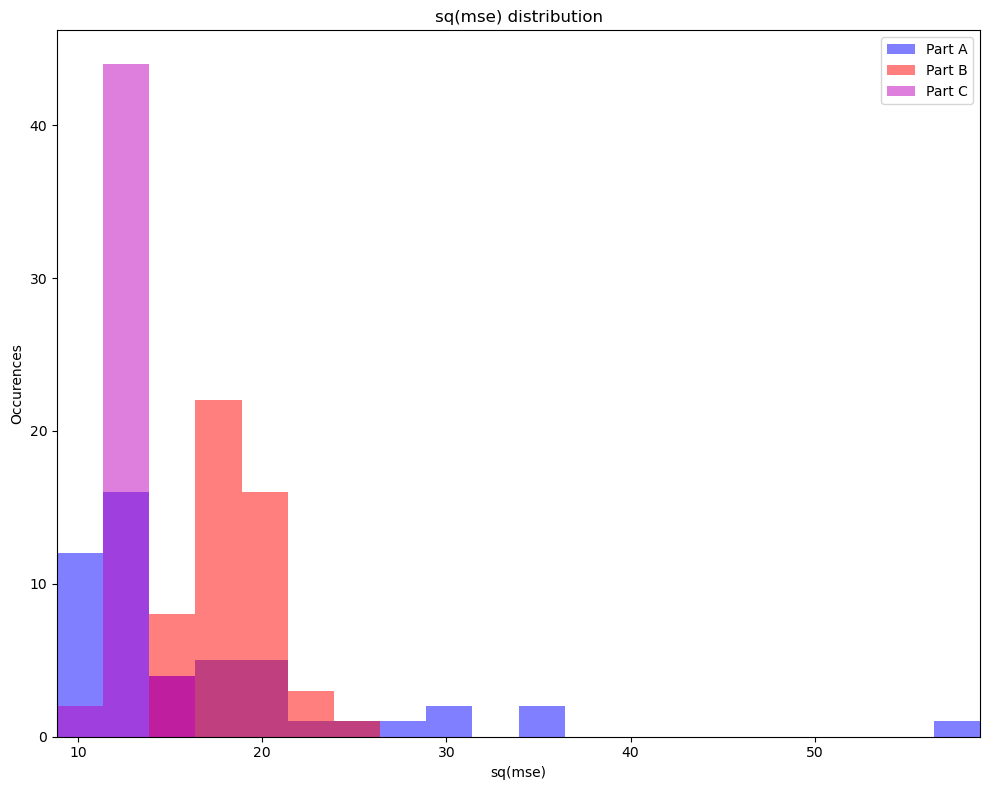

In [30]:
plot_results(result_list = [sq_mse_list_A, sq_mse_list_B, sq_mse_list_C],
             label_list  = ["Part A","Part B","Part C"],
             var_name = "sq(mse)",
             figsize = figsize,
             nbins = nbins)

__How does the mean of the mean squared errors compare to that from Step B?__  
When the number of epocs in incresed we obtain more precise (lower mse mean) and stable (lower standard deviation) results

__Part D: Increase the number of hidden layers__     
Repeat part B but use a neural network with the following instead:

Three hidden layers, each of 10 nodes and ReLU activation function.
How does the mean of the mean squared errors compare to that from Step B?

We start by defining the new architecture  

In [31]:
# Define the new architecture
# model architecture
model_architecture2 = {"layer_1": {"n_units": 10, "activation": "relu"},
                       "layer_2": {"n_units": 10, "activation": "relu"},
                       "layer_3": {"n_units": 10, "activation": "relu"},
                       "layer_4": {"n_units":  1},
                      }

print()
print("input_shape    = {}".format(input_shape))
print("network_config = {}".format(model_architecture2))
print()


input_shape    = (8,)
network_config = {'layer_1': {'n_units': 10, 'activation': 'relu'}, 'layer_2': {'n_units': 10, 'activation': 'relu'}, 'layer_3': {'n_units': 10, 'activation': 'relu'}, 'layer_4': {'n_units': 1}}



In [32]:
# Just launch the function above (train_and_test_several_models), but with pred_norm = True 
# and model_arch = model_architecture2 and epochs = 100
sq_mse_list_D = train_and_test_several_models(X = X,
                                              y = y,
                                              test_size   = test_size,
                                              model_arch  = model_architecture2,
                                              input_shape = input_shape,
                                              optimizer   = "adam",
                                              loss        = "mean_squared_error",
                                              niterations = niterations,
                                              epochs      = 50,
                                              seed        = 3675,
                                              verbose     = 0,
                                              pred_norm   = True,
                                             )


Launching 50 iterations of
 - train/test split => test_size = 0.3
 - Apply predictors normalization
 - model architecture: {'layer_1': {'n_units': 10, 'activation': 'relu'}, 'layer_2': {'n_units': 10, 'activation': 'relu'}, 'layer_3': {'n_units': 10, 'activation': 'relu'}, 'layer_4': {'n_units': 1}}
 - model training:
   * epochs    = 50
   * optimizer = adam
   * loss      = mean_squared_error

Train/test splitting for iteration 1
  X_train.shape = (721, 8)
  y_train.shape = (721,)
  X_test.shape  = (309, 8)
  y_test.shape  = (309,)
       Cement  Blast Furnace Slag   Fly Ash     Water  Superplasticizer  \
723  0.260617           -0.863998 -0.825639  0.448707         -1.007613   
112  1.477748            1.174001 -0.825639  0.163870          0.870100   
278 -0.292281           -0.863998  1.058232  0.282552         -0.026465   
641 -0.305490           -0.863998 -0.825639 -0.026021         -1.007613   
270 -0.477209           -0.863998  1.110782 -0.405804          0.125781   

     Coa

C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_150"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_300 (Dense)                    │ (None, 10)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_301 (Dense)                    │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_302 (Dense)                    │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_303 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)



10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1: sqrt(mse) = 12.39395236391848


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2: sqrt(mse) = 11.887185276081981


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
3: sqrt(mse) = 10.591587546264025


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
4: sqrt(mse) = 10.98850042726796


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step
5: sqrt(mse) = 9.533289091404827


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
6: sqrt(mse) = 12.423482626817306


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
7: sqrt(mse) = 11.492731481357765


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
8: sqrt(mse) = 10.624911310802224


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
9: sqrt(mse) = 11.900808199027715


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
10: sqrt(mse) = 10.923989927072077


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
11: sqrt(mse) = 10.93214789473306


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
12: sqrt(mse) = 12.216505707492418


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
13: sqrt(mse) = 11.429455509378709


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
14: sqrt(mse) = 10.618910884532328


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
15: sqrt(mse) = 11.269731242478352


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
16: sqrt(mse) = 11.73776412665966


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
17: sqrt(mse) = 11.832513733624985


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
18: sqrt(mse) = 10.438235723883722


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
19: sqrt(mse) = 11.880118585673216


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
20: sqrt(mse) = 11.59753823755524


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
21: sqrt(mse) = 11.929258639235709


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
22: sqrt(mse) = 9.978517413755807


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
23: sqrt(mse) = 11.378641202475514


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
24: sqrt(mse) = 12.027263392573428


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
25: sqrt(mse) = 11.547106205000057


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
26: sqrt(mse) = 10.038798285281194


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
27: sqrt(mse) = 10.63459479556295


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
28: sqrt(mse) = 10.973738399478416


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
29: sqrt(mse) = 11.510437428216287


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
30: sqrt(mse) = 10.759958971320009


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
31: sqrt(mse) = 10.934258657720232


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
32: sqrt(mse) = 10.126465126758672


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
33: sqrt(mse) = 11.08741226873938


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
34: sqrt(mse) = 9.563199097019123


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
35: sqrt(mse) = 11.080507346695097


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
36: sqrt(mse) = 10.687781422016755


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
37: sqrt(mse) = 12.078183480946663


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
38: sqrt(mse) = 10.903188766413333


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
39: sqrt(mse) = 11.76996958618975


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
40: sqrt(mse) = 11.614550743038077


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
41: sqrt(mse) = 11.935800429471588


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
42: sqrt(mse) = 11.265232662800903


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
43: sqrt(mse) = 10.134477041162185


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
44: sqrt(mse) = 10.403092682917302


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
45: sqrt(mse) = 12.531052361920876


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
46: sqrt(mse) = 11.978138521763665


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
47: sqrt(mse) = 10.962836860007277


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
48: sqrt(mse) = 11.166147125676781


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
49: sqrt(mse) = 11.244639640057633


C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
50: sqrt(mse) = 10.62306845449596



In [33]:
# Calculate the mean and the standard deviation of the metric on the 50 samplings
mean_sqmse_D = np.mean(sq_mse_list_D)
std_sqmse_D  = np.std(sq_mse_list_D)

df_results.loc[df_results.shape[0]] = ["D",mean_sqmse_D,std_sqmse_D]
df_results

,Part,mean_sq_mse,std_sq_mse
0,A,16.751454,8.791785
1,B,18.691383,2.079920
2,C,12.733984,0.711538
3,D,11.191634,0.727475


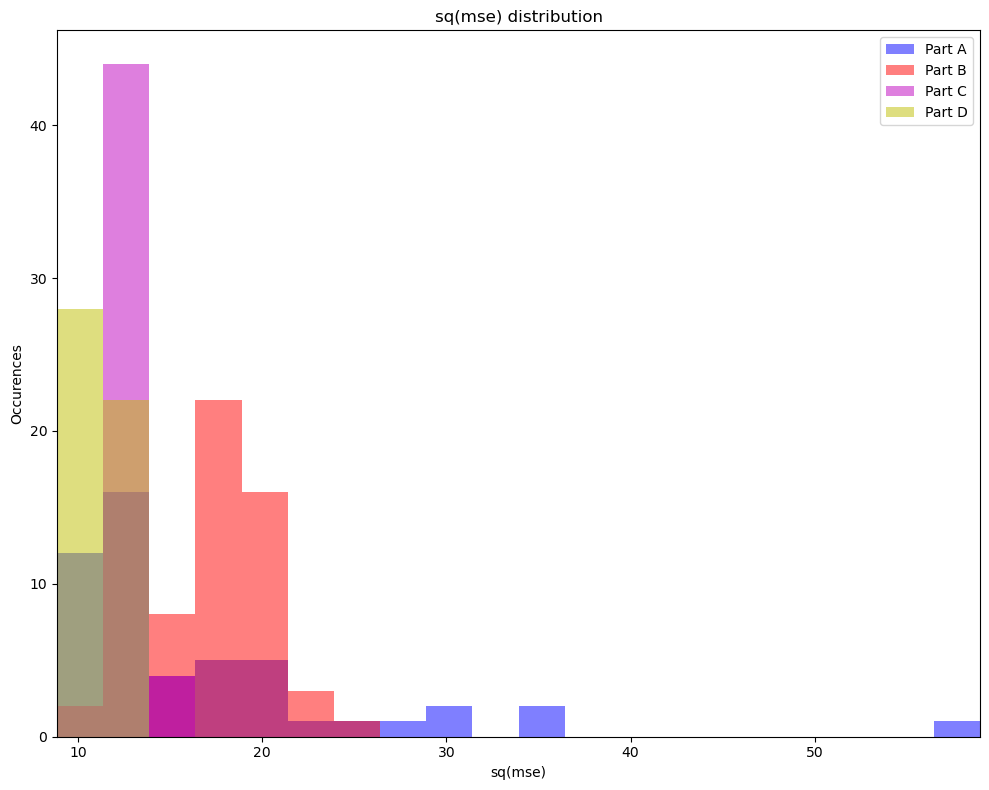

In [34]:
plot_results(result_list = [sq_mse_list_A, sq_mse_list_B, sq_mse_list_C,sq_mse_list_D],
             label_list  = ["Part A","Part B","Part C","Part D"],
             var_name = "sq(mse)",
             figsize = figsize,
             nbins = nbins)

__Compare the mean squared errors compare to that from Step B?__     
By increasing the model complexity (more hidden layers) improves the results, both in terms of precision (mse mean) and stability (mse standard deviation).
However the mse standard deviation of D is greater than that of C.

 